In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn import metrics

Using TensorFlow backend.


## Load data

In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

In [3]:
def show_img(img, ax):
    ax.imshow(img, cmap='Greys')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

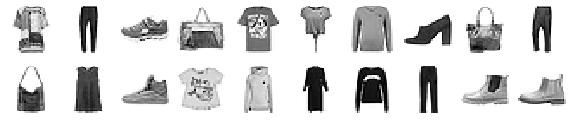

In [4]:
row_count = 2
column_count = 10

fig, ax = plt.subplots(row_count, column_count, figsize=(column_count, row_count))

for x in range(row_count):
    for y in range(column_count):
        show_img(x_train_orig[np.random.randint(0, x_train_orig.shape[0] - 1)], ax[x, y])

plt.show()

## Pre-prcess data

In [5]:
img_rows = 28
img_cols = 28
num_classes = 10

In [6]:
# Add missing channel dimension
x_train = x_train_orig.reshape(x_train_orig.shape[0], img_rows, img_cols, 1)
x_test = x_test_orig.reshape(x_test_orig.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

In [16]:
mask_train = np.random.binomial(1, .05, y_train.shape[0]).astype('bool')
mask_test = np.random.binomial(1, .1, y_test.shape[0]).astype('bool')

x_train = x_train[mask_train]
x_test = x_test[mask_test]

y_train = y_train[mask_train]
y_test = y_test[mask_test]

print('Number of training images: {}'.format(x_train.shape[0]))
print('Number of test images:     {}'.format(x_test.shape[0]))

Number of training images: 149
Number of test images:     111


## Define model

In [8]:
model = Sequential();
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), strides=2, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

## Train model

In [10]:
batch_size = 32
epochs = 10

In [11]:
%%time
train_hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2967 samples, validate on 1038 samples
Epoch 1/10
2967/2967 [==============================] - 8s 3ms/step - loss: 0.9543 - categorical_accuracy: 0.6623 - val_loss: 0.6985 - val_categorical_accuracy: 0.7611
Epoch 2/10
2967/2967 [==============================] - 7s 2ms/step - loss: 0.5129 - categorical_accuracy: 0.8129 - val_loss: 0.5562 - val_categorical_accuracy: 0.8150
Epoch 3/10
2967/2967 [==============================] - 8s 3ms/step - loss: 0.4216 - categorical_accuracy: 0.8493 - val_loss: 0.6115 - val_categorical_accuracy: 0.8102
Epoch 4/10
2967/2967 [==============================] - 8s 3ms/step - loss: 0.3574 - categorical_accuracy: 0.8699 - val_loss: 0.5096 - val_categorical_accuracy: 0.8304
Epoch 5/10
2967/2967 [==============================] - 7s 2ms/step - loss: 0.3032 - categorical_accuracy: 0.8898 - val_loss: 0.5200 - val_categorical_accuracy: 0.8198
Epoch 6/10
2967/2967 [==============================] - 7s 2ms/s

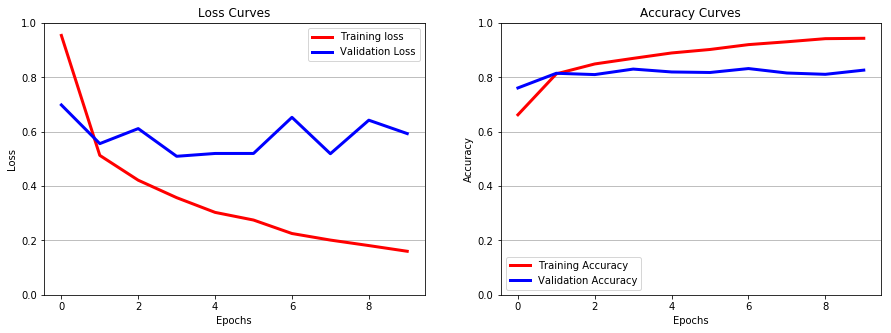

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Loss Curves
ax[0].plot(train_hist.history['loss'],'r',linewidth=3.0)
ax[0].plot(train_hist.history['val_loss'],'b',linewidth=3.0)
ax[0].grid(True, axis = 'y')
ax[0].legend(['Training loss', 'Validation Loss'])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curves')

# Accuracy Curves
ax[1].plot(train_hist.history['categorical_accuracy'],'r',linewidth=3.0)
ax[1].plot(train_hist.history['val_categorical_accuracy'],'b',linewidth=3.0)
ax[1].grid(True, axis = 'y')
ax[1].legend(['Training Accuracy', 'Validation Accuracy'])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curves')

plt.show()

## Validate

In [13]:
y_test_pred = model.predict(x_test)

y_test_value = np.argmax(y_test, axis=1)
y_test_pred_value = np.argmax(y_test_pred, axis=1)

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


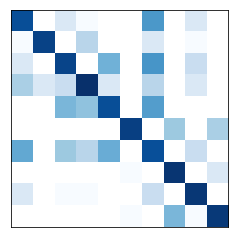

In [14]:
confusion_matrix = metrics.confusion_matrix(y_test_value, y_test_pred_value)
plt.imshow(np.log(confusion_matrix), cmap='Blues')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [15]:
print('Accuracy:', metrics.accuracy_score(y_test_value, y_test_pred_value))

Accuracy: 0.8265895953757225
